In [6]:
pip install librosa

     |████████████████████████████████| 203 kB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 377 kB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 7.8 MB/s eta 0:00:011
     |████████████████████████████████| 323 kB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 613 kB 7.3 MB/s eta 0:00:01
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23141 sha256=6ad40196c90b61cb31b5ca011cf527b365bfd0c8de0cfc01cdbc6363412452d6
  Stored in directory: /Users/jungsujin/Library/Caches/pip/wheels/49/5a/e4/df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320718 sha256=451aa562122696c508155a57b6d40e30bef501b1c57f88a91b850d5915f20f9c
  Stored in directory: /Users/jungsujin/Library/Caches/pip/wheels/6f/d1/5d/f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built audioread resampy
Note: you may need to restart the kernel to use updated packa

In [7]:
import numpy as np
from scipy.io import wavfile
import os
from tqdm.notebook import tqdm
import librosa
from pathlib import Path
import matplotlib.pyplot as plt
import IPython.display as ipd
import glob
import soundfile as sf

## 1. 함수 설정

In [8]:
## 파일 읽어오기
def load_audio(file_path, sr=22050):
    """
       file_path : 파일위치
       sr : 오디오를 읽을 때 Sampling rate 지정
    """
    ## 확장자 추출
    ext = Path(file_path).suffix
    
    ## 파일 읽기
    if ext in ['.wav', '.flac']:
        wav, sr = librosa.load(file_path, sr=sr)
    elif ext == '.pcm':
        wav = np.memmap(file_path, dtype='h', mode='r').astype('float32') / 32767
    elif ext in ['.raw', '.RAW']:
        wav, sr = sf.read(file_path, channels=1, samlerate=sr, format='RAW', subtype='PCM_16')
    else:
        raise ValueError("Unsupported preprocess method : {0}".format(ext))
        
    return wav, sr

## 공백 자르기(패딩 추가)
def trim_audio(wav, top_db=10, pad_len=4000):
    """
    
    """
    ## 최대 db에 따라 음성의 자를 위치 판별
    non_silence_indices = librosa.effects.split(wav, top_db=top_db)
    start = non_silence_indices[0][0]
    end = non_silence_indices[-1][1]
    
    ## 음성 자르기
    wav = wav[start:end]
    
    ## padding 추가
    wav = np.hstack([np.zeros(pad_len), wav, np.zeros(pad_len)])
    
    return wav

## WAV 그려보기
def plot_wav(wav, sr):
    ## 그려보기
    plt.figure(1)

    plot_a = plt.subplot(211)
    plot_a.plot(wav)
    plot_a.set_xlabel('sample rate * time')
    plot_a.set_ylabel('energy')

    plot_b = plt.subplot(212)
    plot_b.specgram(wav, NFFT=1024, Fs=sr, noverlap=900)
    plot_b.set_xlabel('Time')
    plot_b.set_ylabel('Frequency')

    plt.show()

## 2. 샘플

In [17]:
## Wav 파일 읽어오기  pcm 또는 다른 확장자도 사용 가능.
root_path = 'jss_trim'
file_list = glob.glob(os.path.join(root_path, "*.wav"))
#file_list = glob.glob(os.path.join(root_path, "*.pcm"))

In [20]:
## 파일 불러오기(타코트론2는 기본적으로 22050 sampling rate에서 동작)
wav, sr = load_audio(file_list[0])
ipd.Audio(wav, rate=sr)

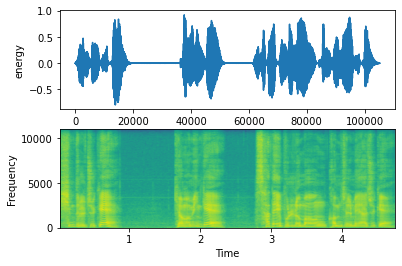

In [21]:
plot_wav(wav, sr)

In [23]:
## 오디오 자르기
trimed_wav= trim_audio(wav, top_db=10)
ipd.Audio(trimed_wav, rate=sr)

/Users/jungsujin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


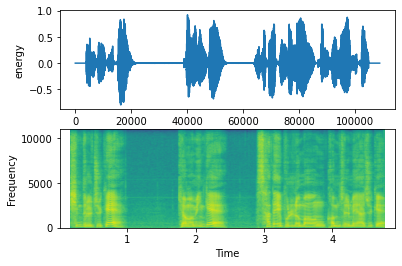

In [24]:
plot_wav(trimed_wav, sr)

## 3. 전체 전처리

In [25]:
## 타코트론2는 기본적으로 22050 sampling rate에서 동작
sampling_rate = 22050

## 환경에 따라 소리 크기를 변경하여 앞 뒤의 음성을 제거할 수 있도록 설정
decibel=10

In [30]:
## Wav 파일 읽어오기  pcm 또는 다른 확장자도 사용 가능.
root_path = 'jss_trim'
file_list = glob.glob(os.path.join(root_path, "*.wav"))
#file_list = glob.glob(os.path.join(root_path, "*.pcm"))

In [31]:
## 저장할 위치 선택
save_path = 'jss_modified'
os.makedirs(save_path, exist_ok=True)

In [32]:
for file_path in tqdm(file_list):
    
    ## 파일 불러오기(타코트론2는 기본적으로 22050 sampling rate에서 동작)
    wav, sr = load_audio(file_path, sr=sampling_rate)
    
    ## 오디오 자르기(패딩 추가)
    trimed_wav= trim_audio(wav, top_db=decibel)
    
    filename=Path(file_path).name
    temp_save_path = os.path.join(save_path, filename)
    
    ## 저장하기
    sf.write(temp_save_path, trimed_wav, sampling_rate)

  0%|          | 0/51 [00:00<?, ?it/s]